# Contents List
- Importing Libraries and Data Frames
    - orders_products_customers
- fix frequncy flag
- PII
- Region column
- Exclusion flag for low-activity customers
- Income Flag column
- Analysis - comparing values/ max,min, mean
- Visualizations
- Export
    - final_sample_2
    - visualizations

# 01. Import Libraries and Dataframes

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\kesmc\Documents\2023 Instacart Basket Analysis CF'

In [8]:
ords_prods_customer=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers.pkl'))

In [9]:
ords_prods_customer.head()

,Unnamed: 0_x,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,frequency_flag,First Name,Last Name,Gender,State,Age,date_joined,n_dependants,fam_status,income
0,0,2539329,1,1,2,8,NaN,196,1,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,1,2398795,1,2,3,7,15.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2,473747,1,3,3,12,21.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,3,2254736,1,4,4,7,29.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,4,431534,1,5,4,15,28.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


## Task 2

Consider security implications and PII
The first and last name coulumns especially in conjuction with each other and other pieces of data should be handled with care especially when it comes to presenting findings. If concerns arise could exclude names entirely from analysis data.

## Task 3

In [12]:
ords_prods_customer['State'].value_counts(dropna=False).sort_index()

Alabama                 638003
Alaska                  648495
Arizona                 653964
Arkansas                636144
California              659783
Colorado                639280
Connecticut             623022
Delaware                637024
District of Columbia    613695
Florida                 629027
Georgia                 656389
Hawaii                  632901
Idaho                   607119
Illinois                633024
Indiana                 627282
Iowa                    625493
Kansas                  637538
Kentucky                632490
Louisiana               637482
Maine                   638583
Maryland                626579
Massachusetts           646358
Michigan                630928
Minnesota               647825
Mississippi             632675
Missouri                640732
Montana                 635265
Nebraska                625813
Nevada                  636139
New Hampshire           615378
New Jersey              627692
New Mexico              654494
New York

In [9]:
ords_prods_customer.shape

(32404859, 33)

In [13]:
# create a region column
## for loop code
region = []

for value in ords_prods_customer["State"]:
  if value in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']:
    region.append("Northeast")
  elif value in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']:
    region.append("Midwest")
  elif value in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia',  'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana'] :
    region.append("South")   
  elif value in ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']:
    region.append("West")

In [12]:
region

['South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 '

In [14]:
## creating new column within df
ords_prods_customer['Region']=region

In [14]:
ords_prods_customer['Region'].value_counts(dropna=False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: Region, dtype: int64

In [15]:
ords_prods_customer.head()

,Unnamed: 0_x,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,First Name,Last Name,Gender,State,Age,date_joined,n_dependants,fam_status,income,Region
0,0,2539329,1,1,2,8,NaN,196,1,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
1,1,2398795,1,2,3,7,15.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
2,2,473747,1,3,3,12,21.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
3,3,2254736,1,4,4,7,29.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
4,4,431534,1,5,4,15,28.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South


In [3]:
pd.options.display.max_columns=None

In [4]:
pd.options.display.max_rows=None

In [28]:
ords_prods_customer.shape

(32404859, 35)

In [10]:
#reduce samples to only those necessary to the chart
df_1 = ords_prods_customer[['Region','spending_flag']]

In [21]:
#Determine spending habits between regions by crossing region column with spending flagcolumn
spending_habits=df_1.groupby(['spending_flag', 'Region']).value_counts(dropna=False).sort_index()

In [17]:
spending_habits

<bound method Series.sort_index of spending_flag  Region   
High spender   Midwest        155975
               Northeast      108225
               South          209691
               West           160354
Low spender    Midwest       7441350
               Northeast     5614511
               South        10582194
               West          8132559
dtype: int64>

In [14]:
spending_habits_2=df_1.groupby(['Region','spending_flag']).value_counts(dropna=False)

In [15]:
spending_habits_2

Region     spending_flag
Midwest    High spender       155975
           Low spender       7441350
Northeast  High spender       108225
           Low spender       5614511
South      High spender       209691
           Low spender      10582194
West       High spender       160354
           Low spender       8132559
dtype: int64

<AxesSubplot:xlabel='Region,spending_flag'>

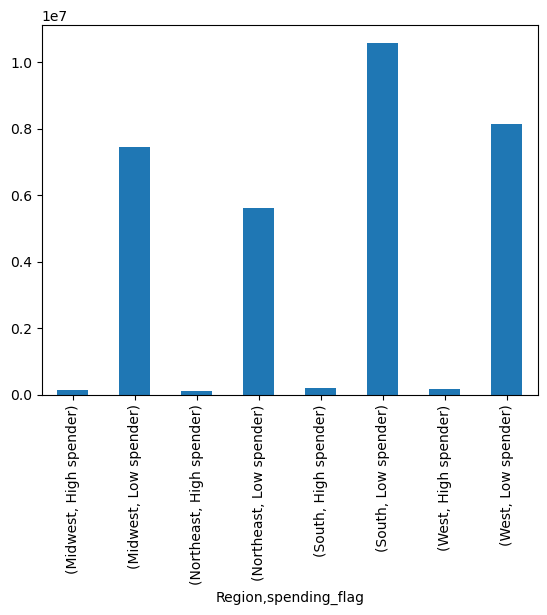

In [20]:
#bar chart
df_1.groupby(['Region','spending_flag']).value_counts(dropna=False).sort_index().plot.bar()

## Task 4

Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data

In [5]:
#low activity
ords_prods_customer.loc[ords_prods_customer['max_order'] < 5, 'low activity'] = 0

In [6]:
#include in final sample
ords_prods_customer.loc[ords_prods_customer['max_order'] >= 5, 'low activity'] = 1

In [7]:
ords_prods_customer['low activity'].value_counts(dropna=False)

1.0    30964564
0.0     1440295
Name: low activity, dtype: int64

In [8]:
ords_prods_customer.shape

(32404859, 35)

In [9]:
#delete rows with low activity
sample=ords_prods_customer.loc[ords_prods_customer['low activity']==1]

In [10]:
sample.head()

,Unnamed: 0_x,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0_y,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,order_frequency,frequency_flag,First Name,Last Name,Gender,State,Age,date_joined,n_dependants,fam_status,income,Region,low activity
0,0,2539329,1,1,2,8,NaN,196,1,0,195,Soda,77,7,9.0,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,1.0
1,1,2398795,1,2,3,7,15.0,196,1,1,195,Soda,77,7,9.0,Mid-range product,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,1.0
2,2,473747,1,3,3,12,21.0,196,1,1,195,Soda,77,7,9.0,Mid-range product,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,1.0
3,3,2254736,1,4,4,7,29.0,196,1,1,195,Soda,77,7,9.0,Mid-range product,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,1.0
4,4,431534,1,5,4,15,28.0,196,1,1,195,Soda,77,7,9.0,Mid-range product,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,1.0


In [11]:
sample.shape

(30964564, 35)

In [12]:
#export sample
sample.to_pickle(r'C:\Users\Kerry\Documents\Katie CF\final_sample.pkl')

## Task 5 & 6 & 7

In [3]:
#reduce samples 
df_5 = sample['income']

In [4]:
df_5.head()

0    40423
1    40423
2    40423
3    40423
4    40423
Name: income, dtype: int64

<AxesSubplot:ylabel='Frequency'>

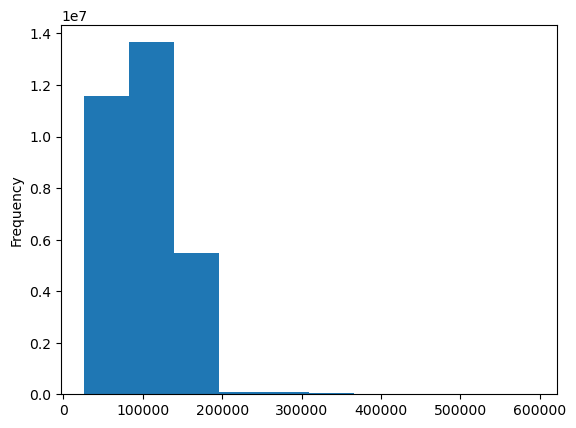

In [5]:
df_5.plot.hist(bins=10)

In [6]:
#income flag
sample.loc[sample['income'] < 60000, 'income_flag'] = 'low income'

In [7]:
sample.loc[(sample['income'] >= 60000) & (sample['income']<120000),'income_flag'] = 'regular income'

In [8]:
sample.loc[(sample['income'] >=120000) & (sample['income']<180000),'income_flag'] = 'high income'

In [9]:
sample.loc[sample['income'] >=180000, 'income_flag'] = 'very high income'

In [10]:
sample['income_flag'].value_counts(dropna=False)

regular income      15982031
high income          8888899
low income           5802750
very high income      290884
Name: income_flag, dtype: int64

In [11]:
#reduce samples to only those necessary to below
df_2 = sample[['Region','income_flag','frequency_flag', 'spending_flag', 'department_id']]

In [12]:
df_2['income_flag'].value_counts()

regular income      15982031
high income          8888899
low income           5802750
very high income      290884
Name: income_flag, dtype: int64

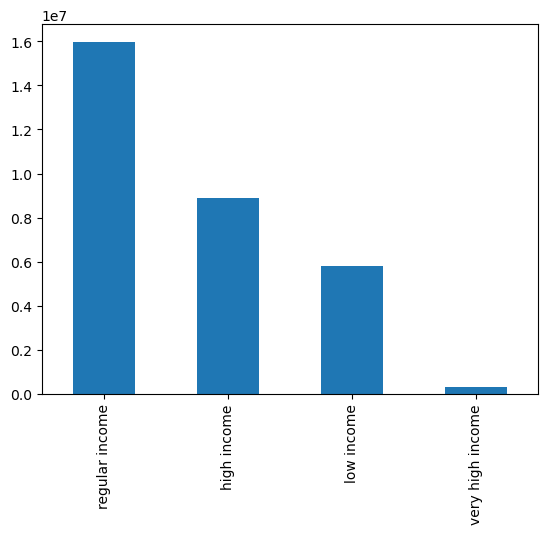

In [13]:
#Visualization of distribution of profiles
income_flag_bar=df_2['income_flag'].value_counts().plot.bar()

In [14]:
df_3=df_2[['Region','income_flag']]

In [15]:
df_3.groupby(['Region','income_flag']).value_counts(dropna=False)

Region     income_flag     
Midwest    high income         2115669
           low income          1341096
           regular income      3731311
           very high income      73437
Northeast  high income         1583548
           low income          1020134
           regular income      2815673
           very high income      45330
South      high income         2926154
           low income          1965984
           regular income      5321662
           very high income      97339
West       high income         2263528
           low income          1475536
           regular income      4113385
           very high income      74778
dtype: int64

In [16]:
df_4=sample[['income_flag', 'max_order']]

In [17]:
# Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure
df_4.groupby(['income_flag']).describe()

max_order                                               \
                       count       mean        std  min   25%   50%   75%   
income_flag                                                                 
high income        8888899.0  34.509810  25.058114  5.0  14.0  28.0  48.0   
low income         5802750.0  33.229691  24.569864  5.0  13.0  26.0  47.0   
regular income    15982031.0  34.746264  24.894731  5.0  15.0  28.0  49.0   
very high income    290884.0  38.100153  25.390434  5.0  18.0  33.0  52.0   

                        
                   max  
income_flag             
high income       99.0  
low income        99.0  
regular income    99.0  
very high income  99.0

In [18]:
df_6=sample[['income_flag', 'average_price']]

In [19]:
df_6.groupby(['income_flag']).describe()

average_price                                              \
                         count        mean         std      min        25%   
income_flag                                                                  
high income          8888899.0   12.334670   98.112048   7.0000   7.559795   
low income           5802750.0    7.091202    0.945677   1.0000   6.588889   
regular income      15982031.0    9.031488   40.372801   7.0000   7.546868   
very high income      290884.0  255.719326  485.668520  24.1033  61.113628   

                                                        
                         50%         75%           max  
income_flag                                             
high income         7.916964    8.310674  15006.940000  
low income          6.913419    7.723443     21.272202  
regular income      7.901510    8.290638   5135.893590  
very high income  114.114368  242.542587  10209.987755

## Task 8

In [3]:
df_7=sample[['income_flag', 'Region']]

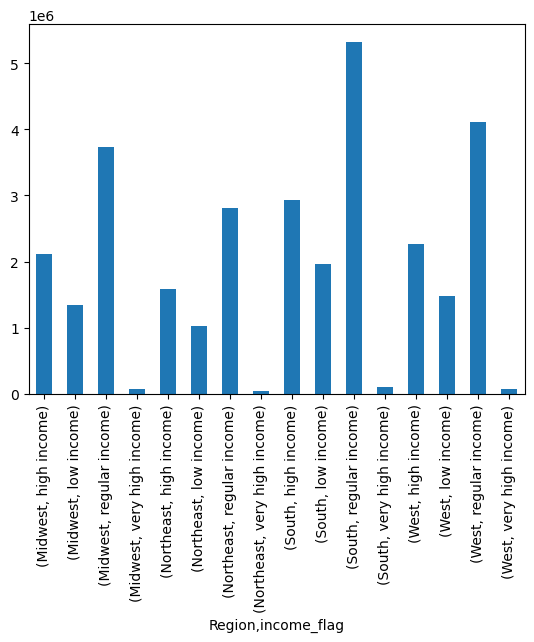

In [4]:
# Compare your customer profiles with regions and departments
#bar chart
income_regions_bar=df_7.groupby(['Region','income_flag']).value_counts(dropna=False).sort_index().plot.bar('red','blue')

In [3]:
df_8=sample[['income_flag', 'department_id']]

<AxesSubplot:xlabel='department_id,income_flag'>

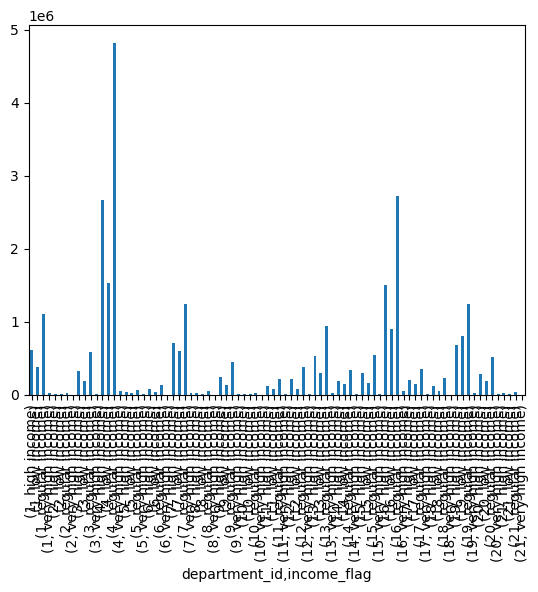

In [33]:
#bar chart
df_8.groupby(['department_id','income_flag']).value_counts(dropna=False).sort_index().plot.bar()

## Task 9 - Visualizations

In [4]:
df_9=sample[['Region','spending_flag']]

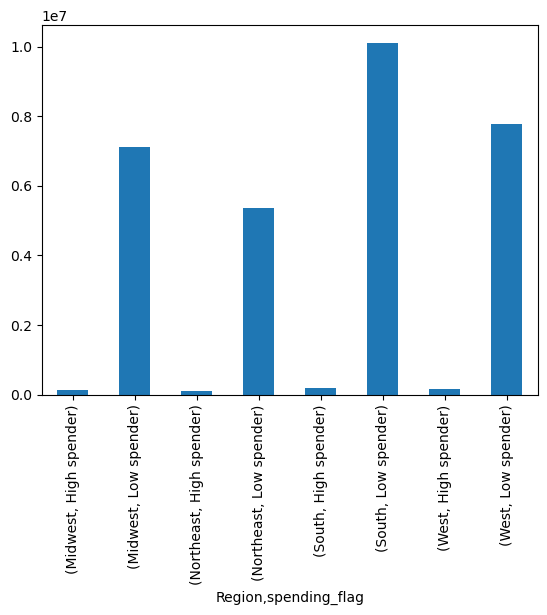

In [5]:
#bar chart
region_spending_bar=df_9.groupby(['Region','spending_flag']).value_counts(dropna=False).sort_index().plot.bar()

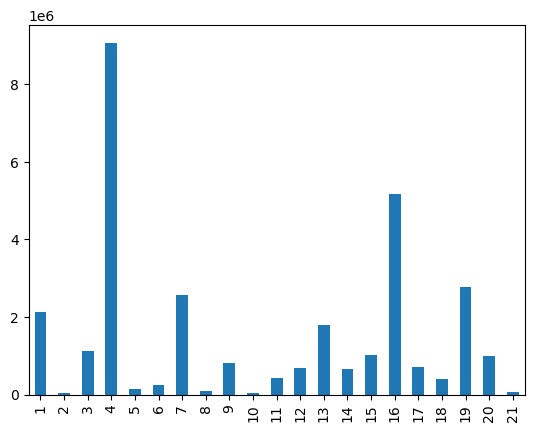

In [6]:
#bar chart
departments_bar=df_8['department_id'].value_counts(dropna=False).sort_index().plot.bar()

In [7]:
df_10=sample[['income','average_price']]

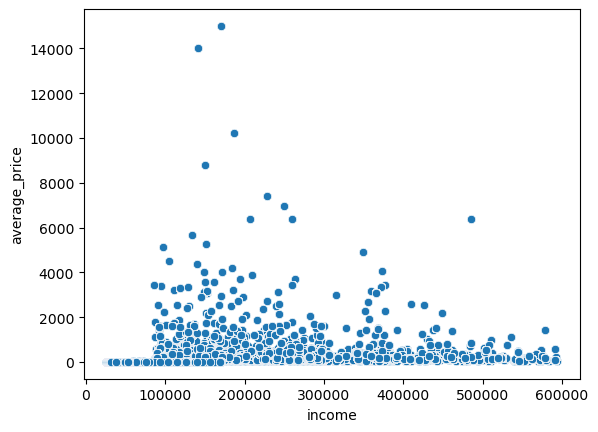

In [10]:
income_spending_scatter=sns.scatterplot(x='income', y='average_price', data=df_10)

# Export

In [20]:
#final dataset
sample.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_sample.pkl'))

In [21]:
#income
income_flag_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_flag_bar.png'))

In [6]:
#region and income
income_regions_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_regions_bar.png'))

In [8]:
#region spending
region_spending_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_spending_bar.png'))

In [9]:
#departments
departments_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'departments_bar.png'))

In [11]:
#income and spending habits
income_spending_scatter.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_spending_scatter.png'))